# Initial Experiments with Neural Fingerprint Embeddings

This notebook contains experiments varying the complexity of graphs upon which the neural fingerprint embedding is applied. Our hypothesis rests on the notion that NF embeddings perform well on smaller graphs with clearly distinguishable features but fail on complicated (or more generally, random) graphs. 

* Experiment 1: 500 Identical Cycle Graphs compared to 500 Identical Barabasi-Albert Graphs
* Experiment 2: 500 Different Erdos-Renyi Graphs compared to 500 Different Barabasi-Albert Graphs
* Experiment 3: 500 Identical Cycle Graphs compared to 500 Different Barabasi-Albert Graphs
* Experiment 4: 500 Identical Erdos-Renyi Graphs compared to 500 Identical Barabasi-Albert Graphs

In [1]:
import os, sys
import networkx as nx

sys.path.append("/afs/cs.stanford.edu/u/manans/Desktop/graph-embeddings/embed/")
from embed import embed

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

from tqdm import tqdm

train_dir = '/dfs/scratch0/manans/nf-exp/train'
train_labels = {}
test_dir  = '/dfs/scratch0/manans/nf-exp/test'
emb_dir   = '/dfs/scratch0/manans/nf-exp/emb'

def save_graph(G, name, directory):
    nx.write_edgelist(G, directory + "/" + name)
    
def clean():
    os.system("rm " + train_dir + "/*")
    os.system("rm " + test_dir  + "/*")
    os.system("rm " + emb_dir   + "/*")
    
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    fig = plt.figure()
    for i in range(X.shape[0]):
        if y[i] == 0:
            clr = 'b'
        elif y[i] == 1:
            clr = 'r'
        point = plt.plot(X[i, 0], X[i, 1], color=clr, marker='o')

    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

# Experiment 1: 500 Identical Circle, 500 Identical Barabasi-Albert

In [2]:
circle_graphs = []
G = nx.cycle_graph(50)
for i in tqdm(xrange(500)):
    save_graph(G, str(i) + '.edgelist', train_dir if i < 400 else test_dir)
    if i < 400:
        train_labels[str(i) + '.edgelist'] = 0
    circle_graphs.append(G)
    
ba_graphs = []
G = nx.barabasi_albert_graph(50, 5, 0)
for i in tqdm(xrange(500)):
    save_graph(G, str(i + 500) + '.edgelist', train_dir if (i + 500) < 900 else test_dir)
    if (i + 500) < 900:
        train_labels[str(i + 500) + '.edgelist'] = 1
    ba_graphs.append(G)

100%|██████████| 500/500 [00:14<00:00, 33.67it/s]


In [ ]:
e1_fingerprint_embeddings = \
    embed(train_input_directory     = train_dir,
            train_label_mapping     = train_labels,
            test_input_directory    = test_dir,
            test_output_directory   = emb_dir,
            method                  = 'nf-original',
            n_epochs                = 5,
            train                   = True)

In [4]:
X = np.array([])
y = []

for i, key in enumerate(e1_fingerprint_embeddings.keys()):
    if i == 0:
        X = np.hstack((X, e1_fingerprint_embeddings[key]))
    else:
        X = np.vstack((X, e1_fingerprint_embeddings[key]))
    y.append(0 if int(key) < 500 else 1)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 199 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] Iteration 25: error = 0.0000384, gradient norm = 0.0000007
[t-SNE] Iteration 25: gradient norm 0.000001. Finished.
[t-SNE] Iteration 50: error = 0.0000295, gradient norm = 0.0000003
[t-SNE] Iteration 50: gradient norm 0.000000. Finished.
[t-SNE] KL divergence after 50 iterations with early exaggeration: 0.000029
[t-SNE] Iteration 75: error = 0.0000228, gradient norm = 0.0000002
[t-SNE] Iteration 75: gradient norm 0.000000. Finished.
[t-SNE] Error after 75 iterations: 0.000029


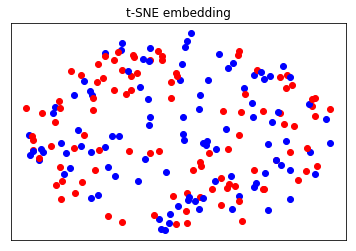

In [5]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=200, n_iter=3000, verbose=2)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, y, "t-SNE embedding")

# Experiment 2: 500 Different Erdos-Renyi, 500 Different Barabasi-Albert

In [ ]:
er_graphs = []
for i in tqdm(xrange(500)):
    G = nx.erdos_renyi_graph(50, 0.2)
    save_graph(G, str(i) + '.edgelist', train_dir if i < 400 else test_dir)
    if i < 400:
        train_labels[str(i) + '.edgelist'] = 0
    er_graphs.append(G)
    
ba_graphs = []
for i in tqdm(xrange(500)):
    G = nx.barabasi_albert_graph(50, 5)
    save_graph(G, str(i + 500) + '.edgelist', train_dir if (i + 500) < 900 else test_dir)
    if (i + 500) < 900:
        train_labels[str(i + 500) + '.edgelist'] = 1
    ba_graphs.append(G)

In [ ]:
e2_fingerprint_embeddings = \
    embed(train_input_directory     = train_dir,
            train_label_mapping     = train_labels,
            test_input_directory    = test_dir,
            test_output_directory   = emb_dir,
            method                  = 'nf-original',
            n_epochs                = 10,
            train                   = True)

In [ ]:
X = np.array([])
y = []

for i, key in enumerate(e2_fingerprint_embeddings.keys()):
    if i == 0:
        X = np.hstack((X, e2_fingerprint_embeddings[key]))
    else:
        X = np.vstack((X, e2_fingerprint_embeddings[key]))
    y.append(0 if int(key) < 500 else 1)

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=200, n_iter=3000, verbose=2)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, y, "t-SNE embedding")

# Experiment 3: 500 Identical Cycle Graphs, 500 Different BA Graphs

In [ ]:
circle_graphs = []
G = nx.cycle_graph(50)
for i in tqdm(xrange(500)):
    save_graph(G, str(i) + '.edgelist', train_dir if i < 400 else test_dir)
    if i < 400:
        train_labels[str(i) + '.edgelist'] = 0
    circle_graphs.append(G)
    
ba_graphs = []
for i in tqdm(xrange(500)):
    G = nx.barabasi_albert_graph(50, 5)
    save_graph(G, str(i + 500) + '.edgelist', train_dir if (i + 500) < 900 else test_dir)
    if (i + 500) < 900:
        train_labels[str(i + 500) + '.edgelist'] = 1
    ba_graphs.append(G)

In [ ]:
e3_fingerprint_embeddings = \
    embed(train_input_directory     = train_dir,
            train_label_mapping     = train_labels,
            test_input_directory    = test_dir,
            test_output_directory   = emb_dir,
            method                  = 'nf-original',
            n_epochs                = 5,
            train                   = True)

In [ ]:
X = np.array([])
y = []

for i, key in enumerate(e3_fingerprint_embeddings.keys()):
    if i == 0:
        X = np.hstack((X, e3_fingerprint_embeddings[key]))
    else:
        X = np.vstack((X, e3_fingerprint_embeddings[key]))
    y.append(0 if int(key) < 500 else 1)

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=200, n_iter=3000, verbose=2)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, y, "t-SNE embedding")

# Experiment 4: 500 Identical ER Graphs, 500 Identical BA Graphs

In [ ]:
er_graphs = []
G = nx.erdos_renyi_graph(50, 0.2)
for i in tqdm(xrange(500)):
    save_graph(G, str(i) + '.edgelist', train_dir if i < 400 else test_dir)
    if i < 400:
        train_labels[str(i) + '.edgelist'] = 0
    er_graphs.append(G)
    
ba_graphs = []
G = nx.barabasi_albert_graph(50, 5)
for i in tqdm(xrange(500)):
    save_graph(G, str(i + 500) + '.edgelist', train_dir if (i + 500) < 900 else test_dir)
    if (i + 500) < 900:
        train_labels[str(i + 500) + '.edgelist'] = 1
    ba_graphs.append(G)

In [ ]:
e4_fingerprint_embeddings = \
    embed(train_input_directory     = train_dir,
            train_label_mapping     = train_labels,
            test_input_directory    = test_dir,
            test_output_directory   = emb_dir,
            method                  = 'nf-original',
            n_epochs                = 30,
            train                   = True)

In [ ]:
X = np.array([])
y = []

for i, key in enumerate(e4_fingerprint_embeddings.keys()):
    if i == 0:
        X = np.hstack((X, e4_fingerprint_embeddings[key]))
    else:
        X = np.vstack((X, e4_fingerprint_embeddings[key]))
    y.append(0 if int(key) < 500 else 1)

In [ ]:
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity=200, n_iter=3000, verbose=2)
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, y, "t-SNE embedding")